In [2]:
import pandas as pd

filepath_dict = {'yelp':   'yelp_labelled.txt',
                 'amazon': 'amazon_cells_labelled.txt',
                 'imdb':   'imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [3]:
from sklearn.model_selection import train_test_split
sentences = df['sentence'].values
y = df['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<2061x4506 sparse matrix of type '<class 'numpy.int64'>'
	with 23280 stored elements in Compressed Sparse Row format>

In [28]:
#from keras.models import Sequential
#from keras import layers
#input_dim = X_train.shape[1]  # Number of features
#model = Sequential()
#model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [29]:
 #model.compile(loss='binary_crossentropy', 
              # optimizer='adam', 
               #metrics=['accuracy'])
#model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                45070     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 45,081
Trainable params: 45,081
Non-trainable params: 0
_________________________________________________________________


In [31]:
#model.fit(X_train, y_train,
                   #epochs=100,
                   #  verbose=False,
                    # validation_data=(X_test, y_test),
                     # batch_size=10)

In [32]:
#loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
#print("Training Accuracy: {:.4f}".format(accuracy))
#loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
#print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7889


In [5]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(sentences_train[10])
print(X_train)

Using TensorFlow backend.


A lady at the table next to us found a live green caterpillar In her salad.
[[278, 295, 212, 1907, 39, 349], [43, 10, 4, 607, 323, 15, 1, 47, 2, 3, 350, 37, 109, 1908, 12, 4, 279, 1236], [236, 1909], [56, 296, 15, 1, 1237, 915, 86, 10, 1910, 11, 608, 2, 543, 197, 297], [19, 29], [198, 387, 4], [1, 609, 1911, 324, 16, 610, 17, 53], [65, 225, 8, 96], [21, 189, 916, 8, 24], [728, 25, 127, 1912, 1913, 729, 1, 213, 5, 31, 51, 14, 61, 917, 9, 1, 259, 1238, 178, 918, 52, 9, 1, 213], [4, 1239, 35, 1, 544, 388, 6, 214, 179, 4, 730, 731, 1914, 11, 178, 298], [1915, 1, 1916, 325, 103, 13, 128, 4, 474, 9, 1917, 70, 99, 39, 10, 1918, 156, 1240], [8, 5, 4, 475, 146, 29, 6, 117, 22, 1, 1919, 5, 1920], [919, 476, 545, 545], [40, 920, 18, 1, 1921, 921, 237, 21, 128, 546], [3, 477, 7, 260, 215, 83, 9, 1, 110, 74], [922, 1922, 8, 5, 4, 20, 74, 238, 239, 2, 326, 13, 88, 923, 57, 7], [1, 280, 180, 10, 1241, 2, 3, 104, 1923, 40, 89, 6, 1924, 299, 388, 41], [7, 5, 49, 300, 2, 478, 147, 9, 41, 1242, 4, 732, 9

In [6]:
for word in ['fantastic', 'total', 'aimless', 'bluetooth']:
 print('{}: {}'.format(word, tokenizer.word_index[word]))

fantastic: 236
total: 863
aimless: 1966
bluetooth: 275


In [7]:
from keras.preprocessing.sequence import pad_sequences
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [8]:
print(X_train[0,:])

[ 278  295  212 1907   39  349    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [15]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 50)           230150    
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 230,671
Trainable params: 230,671
Non-trainable params: 0
_________________________________________________________________


In [16]:
MODEL = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.8210


In [17]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(4603, 50)


Text(0.5, 1.0, 'accuray vs epochs')

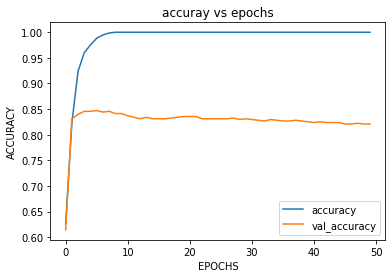

In [18]:
import matplotlib.pyplot as plt

plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.plot(MODEL.history["accuracy"])
plt.plot(MODEL.history["val_accuracy"])
plt.legend(['accuracy','val_accuracy'])
plt.title("accuray vs epochs")

Text(0.5, 1.0, 'loss  vs epochs')

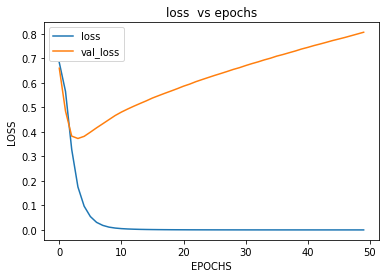

In [19]:
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.plot(MODEL.history["loss"])
plt.plot(MODEL.history["val_loss"])
plt.legend(["loss","val_loss"])
plt.title("loss  vs epochs")

In [20]:
reverse_word_index = dict([(value, key) for (key, value) in tokenizer.word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [21]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [22]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')